Build a regression model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd



In [4]:
combined_poi_df = pd.read_csv('C:\\Users\\aysha\\Documents\\Python Scripts\\Statistical-Modelling-Project\\data\\Combined_POI_data.csv', index_col=0)
combined_poi_df.head()

,category_alias,category_title,poi_name,poi_distance,poi_address,poi_rating,free_bikes,station_lat,station_long
0,mexican,Mexican,Angela's Cafe - Orient Heights,40.670336,1012 Bennington St,4.5,8.0,-71.006098,42.386781
1,breakfast_brunch,Breakfast & Brunch,Angela's Cafe - Orient Heights,40.670336,1012 Bennington St,4.5,8.0,-71.006098,42.386781
2,chinese,Chinese,Little Asia Restaurant,94.503416,991 Bennington St,4.0,8.0,-71.006098,42.386781
3,italian,Italian,Luna's Restaurant Italian and Latin Cuisine,251.881247,945 Saratoga St,4.5,8.0,-71.006098,42.386781
4,latin,Latin American,Luna's Restaurant Italian and Latin Cuisine,251.881247,945 Saratoga St,4.5,8.0,-71.006098,42.386781


In [12]:
# Drop rows where the 'poi_rating' column is null
analysis_df = combined_poi_df.dropna(subset=['poi_rating'])


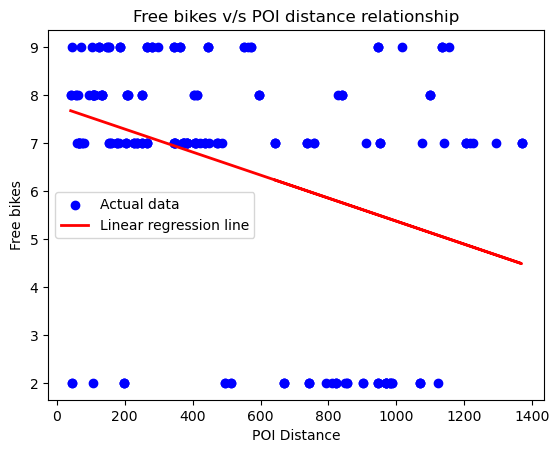

In [15]:
#first build a line plot to study relationship between free bikes in a station and distance from POI
x=analysis_df['poi_distance']
y=analysis_df['free_bikes']

# Reshape the data
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Plot the data points
plt.scatter(x, y, color='blue', label='Actual data')

# Plot the linear regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Linear regression line')

# Add labels and a legend
plt.xlabel('POI Distance')
plt.ylabel('Free bikes')
plt.title('Free bikes v/s POI distance relationship')
plt.legend()

# Show the plot
plt.show()

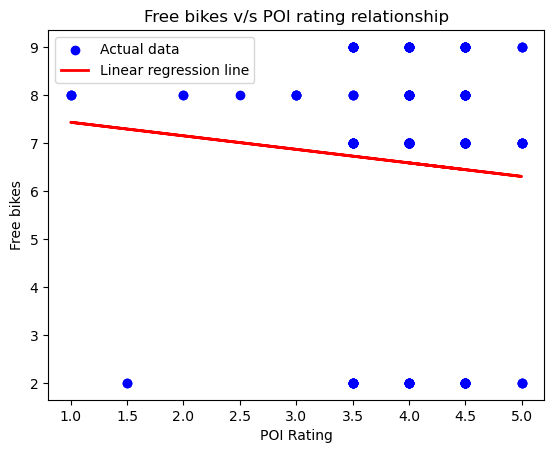

In [16]:
#plot a line plot to study relationship between free bikes in a station and rating of POI
x=analysis_df['poi_rating']
y=analysis_df['free_bikes']

# Reshape the data
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Plot the data points
plt.scatter(x, y, color='blue', label='Actual data')

# Plot the linear regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Linear regression line')

# Add labels and a legend
plt.xlabel('POI Rating')
plt.ylabel('Free bikes')
plt.title('Free bikes v/s POI rating relationship')
plt.legend()

# Show the plot
plt.show()

In [18]:
#Building a linear regression model to check relationship between dependent variable "no. of free bikes" and POI rating
import statsmodels.api as sm

X= analysis_df
y=analysis_df['free_bikes']
X = sm.add_constant(X) # adding a constant
lin_reg = sm.OLS(y,X['poi_rating'])

model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:             free_bikes   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              1188.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):                    1.24e-88
Time:                        11:06:09   Log-Likelihood:                         -513.06
No. Observations:                 212   AIC:                                      1028.
Df Residuals:                     211   BIC:                                      1031.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
#Building a linear regression model to check relationship between dependent variable "no. of free bikes" and distance to POI
import statsmodels.api as sm

X= analysis_df
y=analysis_df['free_bikes']
X = sm.add_constant(X) # adding a constant
lin_reg = sm.OLS(y,X['poi_distance'])

model = lin_reg.fit()
print_model = model.summary()
print(print_model)


                                 OLS Regression Results                                
Dep. Variable:             free_bikes   R-squared (uncentered):                   0.469
Model:                            OLS   Adj. R-squared (uncentered):              0.467
Method:                 Least Squares   F-statistic:                              186.7
Date:                Sun, 10 Dec 2023   Prob (F-statistic):                    7.24e-31
Time:                        14:21:33   Log-Likelihood:                         -646.40
No. Observations:                 212   AIC:                                      1295.
Df Residuals:                     211   BIC:                                      1298.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [25]:
#next try multilinear regression to check impact of multiple independent variables to number of free bikes
import statsmodels.api as sm

X= analysis_df.drop(['free_bikes','category_alias','category_title','poi_address','poi_name'], axis=1)
y=analysis_df['free_bikes']
X = sm.add_constant(X) # adding a constant
lin_reg = sm.OLS(y,X)

model = lin_reg.fit()
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     36.64
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           3.79e-23
Time:                        14:22:38   Log-Likelihood:                -431.79
No. Observations:                 212   AIC:                             873.6
Df Residuals:                     207   BIC:                             890.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.574e+04   5373.869      6.650   

Provide model output and an interpretation of the results. 

*The study of relationship between free bikes in a station and rating of POI indicates that the rating of POI has a significant  impact on the number of free bikes in a bike station. The number of free bikes in a station are lower for stations that have high rating for the points of interest in its vicinity.*

*With a lower regression coefficient, the study of relationship between free bikes in a station and distance from POI indicates that its a weak relationship. However, the study indicates that there are lesser bikes where POI is farther away perhaps because riders like to ride more to reach their POI*

# Stretch

How can you turn the regression model into a classification model?